<a href="https://colab.research.google.com/github/sowmiyagunal04-dev/amazon-financial-analysis-2021-2024/blob/scripts/calculate_ratios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Calculate Ratios and Visuals — Amazon Financials (2021–2024)

This notebook loads the verified dataset `amazon_financials_2021-2024.csv`, computes key financial ratios from raw figures, creates summary tables and charts, and saves visuals for the repository. Run cells sequentially.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

output_dir = '/content/visuals'
os.makedirs(output_dir, exist_ok=True)

pd.options.display.float_format = '{:,.2f}'.format
print("Visuals will be saved to:", output_dir)


Visuals will be saved to: /content/visuals


In [17]:
# If you uploaded file directly to Colab, use this:
csv_path = '/content/amazon_financials_2021-2024.csv'

if not os.path.exists(csv_path):
    raise FileNotFoundError("CSV not found. Upload 'amazon_financials_2021-2024.csv' to Colab or update csv_path.")
df = pd.read_csv(csv_path)
df.head(30)


,Metric,2021,2022,2023,2024,Source
0,Revenue (Net Sales),"469,822,000.00","513,983,000.00","574,785,000.00","637,959,000.00",Income Statement (Yahoo Finance)
1,Cost of Revenue,"272,344,000.00","288,831,000.00","304,739,000.00","326,288,000.00",Income Statement (Yahoo Finance)
2,Gross Profit,"197,478,000.00","225,152,000.00","270,046,000.00","311,671,000.00",Income Statement (Yahoo Finance)
3,Operating Income (EBIT),"24,879,000.00","12,248,000.00","36,852,000.00","68,593,000.00",Income Statement (Yahoo Finance)
4,Net Income,"33,364,000.00","30,425,000.00","59,248,000.00","70,623,000.00",Income Statement (Yahoo Finance)
5,Total Current Assets,"161,580,000.00","146,791,000.00","172,351,000.00","190,867,000.00",Balance Sheet (Yahoo Finance)
6,Total Current Liabilities,"142,266,000.00","155,393,000.00","164,917,000.00","179,431,000.00",Balance Sheet (Yahoo Finance)
7,Total Assets,"420,549,000.00","462,675,000.00","527,854,000.00","624,894,000.00",Balance Sheet (Yahoo Finance)
8,Total Liabilities,"282,304,000.00","316,632,000.00","325,979,000.00","338,924,000.00",Balance Sheet (Yahoo Finance)
9,Shareholders’ Equity,"138,245,000.00","146,043,000.00","201,875,000.00","285,970,000.00",Balance Sheet (Yahoo Finance)


In [18]:
raw_metrics = [
    'Revenue (Net Sales)', 'Cost of Revenue', 'Gross Profit', 'Operating Income (EBIT)', 'Net Income',
    'Total Current Assets', 'Total Current Liabilities', 'Total Assets', 'Total Liabilities', "Shareholders’ Equity",
    'Operating Cash Flow', 'Investing Cash Flow', 'Financing Cash Flow'
]

raw_df = df[df['Metric'].isin(raw_metrics)].set_index('Metric')
raw_df = raw_df[['2021','2022','2023','2024']].transpose().astype(float)
raw_df.index.name = 'Year'
raw_df


Metric,Revenue (Net Sales),Cost of Revenue,Gross Profit,Operating Income (EBIT),Net Income,Total Current Assets,Total Current Liabilities,Total Assets,Total Liabilities,Shareholders’ Equity,Operating Cash Flow,Investing Cash Flow,Financing Cash Flow
Year,,,,,,,,,,,,,
2021,"469,822,000.00","272,344,000.00","197,478,000.00","24,879,000.00","33,364,000.00","161,580,000.00","142,266,000.00","420,549,000.00","282,304,000.00","138,245,000.00","46,327,000.00","-58,154,000.00","6,291,000.00"
2022,"513,983,000.00","288,831,000.00","225,152,000.00","12,248,000.00","30,425,000.00","146,791,000.00","155,393,000.00","462,675,000.00","316,632,000.00","146,043,000.00","84,946,000.00","-59,344,000.00","-15,879,000.00"
2023,"574,785,000.00","304,739,000.00","270,046,000.00","36,852,000.00","59,248,000.00","172,351,000.00","164,917,000.00","527,854,000.00","325,979,000.00","201,875,000.00","115,877,000.00","-83,342,000.00","-11,812,000.00"
2024,"637,959,000.00","326,288,000.00","311,671,000.00","68,593,000.00","70,623,000.00","190,867,000.00","179,431,000.00","624,894,000.00","338,924,000.00","285,970,000.00","121,137,000.00","-123,569,000.00","-8,662,000.00"


In [19]:
def compute_ratios(raw):
    r = pd.DataFrame(index=raw.index)
    r['Gross Profit Margin (%)'] = raw['Gross Profit'] / raw['Revenue (Net Sales)'] * 100
    r['Operating Margin (%)'] = raw['Operating Income (EBIT)'] / raw['Revenue (Net Sales)'] * 100
    r['Net Profit Margin (%)'] = raw['Net Income'] / raw['Revenue (Net Sales)'] * 100
    r['Revenue Growth (%)'] = raw['Revenue (Net Sales)'].pct_change() * 100
    r['Current Ratio'] = raw['Total Current Assets'] / raw['Total Current Liabilities']
    r['Debt-to-Equity'] = raw['Total Liabilities'] / raw["Shareholders’ Equity"]
    r['Asset Turnover'] = raw['Revenue (Net Sales)'] / raw['Total Assets']
    r['ROA (%)'] = raw['Net Income'] / raw['Total Assets'] * 100
    r['ROE (%)'] = raw['Net Income'] / raw["Shareholders’ Equity"] * 100
    r['ROCE (%)'] = raw['Operating Income (EBIT)'] / (raw['Total Assets'] - raw['Total Current Liabilities']) * 100
    return r.round(2)

ratios = compute_ratios(raw_df)
ratios


,Gross Profit Margin (%),Operating Margin (%),Net Profit Margin (%),Revenue Growth (%),Current Ratio,Debt-to-Equity,Asset Turnover,ROA (%),ROE (%),ROCE (%)
Year,,,,,,,,,,
2021,42.03,5.30,7.10,NaN,1.14,2.04,1.12,7.93,24.13,8.94
2022,43.81,2.38,5.92,9.40,0.94,2.17,1.11,6.58,20.83,3.99
2023,46.98,6.41,10.31,11.83,1.05,1.61,1.09,11.22,29.35,10.15
2024,48.85,10.75,11.07,10.99,1.06,1.19,1.02,11.30,24.70,15.40


In [20]:
ratios_csv_path = os.path.join(os.path.dirname(csv_path), 'data_computed_ratios_2021-2024.csv')
ratios.to_csv(ratios_csv_path)
print("Computed ratios saved to:", ratios_csv_path)


Computed ratios saved to: /content/data_computed_ratios_2021-2024.csv


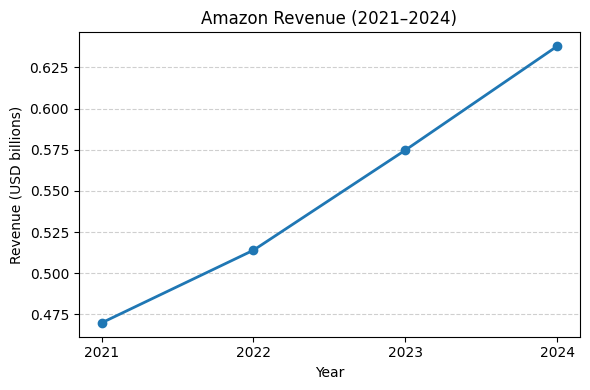

Saved: /content/visuals/revenue_trend.png


In [21]:
years = raw_df.index.tolist()
revenue = raw_df['Revenue (Net Sales)'].values / 1e9  # billions

plt.figure(figsize=(6,4))
plt.plot(years, revenue, marker='o', linewidth=2)
plt.title('Amazon Revenue (2021–2024)')
plt.xlabel('Year')
plt.ylabel('Revenue (USD billions)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
rev_path = os.path.join(output_dir,'revenue_trend.png')
plt.savefig(rev_path, dpi=150)
plt.show()
print('Saved:', rev_path)


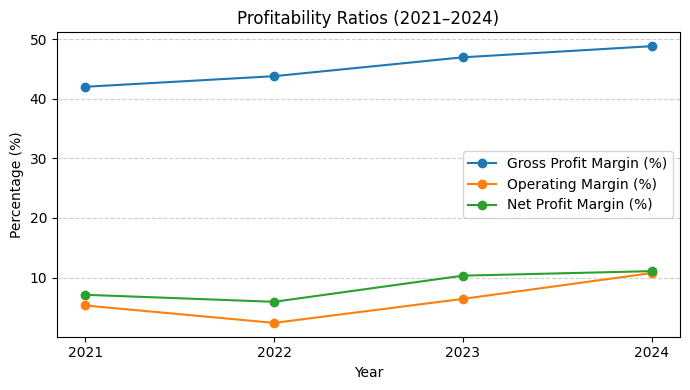

Saved: /content/visuals/profitability_ratios.png


In [22]:
plt.figure(figsize=(7,4))
plt.plot(ratios.index, ratios['Gross Profit Margin (%)'], marker='o', label='Gross Profit Margin (%)')
plt.plot(ratios.index, ratios['Operating Margin (%)'], marker='o', label='Operating Margin (%)')
plt.plot(ratios.index, ratios['Net Profit Margin (%)'], marker='o', label='Net Profit Margin (%)')
plt.title('Profitability Ratios (2021–2024)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
prof_path = os.path.join(output_dir,'profitability_ratios.png')
plt.savefig(prof_path, dpi=150)
plt.show()
print('Saved:', prof_path)


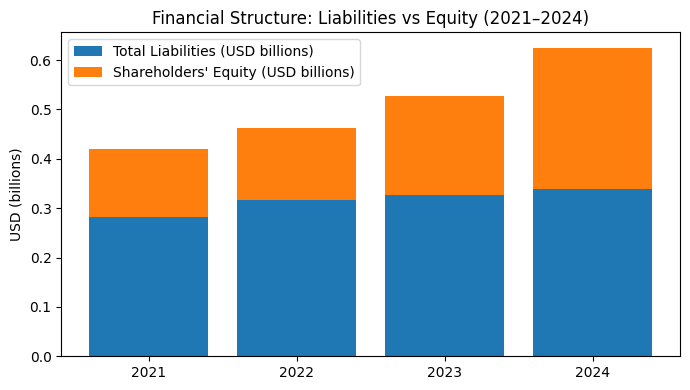

Saved: /content/visuals/financial_structure_flowchart.png


In [23]:
years = raw_df.index
liabilities = raw_df['Total Liabilities'] / 1e9
equity = raw_df["Shareholders’ Equity"] / 1e9

plt.figure(figsize=(7,4))
plt.bar(years, liabilities, label='Total Liabilities (USD billions)')
plt.bar(years, equity, bottom=liabilities, label="Shareholders' Equity (USD billions)")
plt.title('Financial Structure: Liabilities vs Equity (2021–2024)')
plt.ylabel('USD (billions)')
plt.legend()
plt.tight_layout()
fs_path = os.path.join(output_dir,'financial_structure_flowchart.png')
plt.savefig(fs_path, dpi=150)
plt.show()
print('Saved:', fs_path)


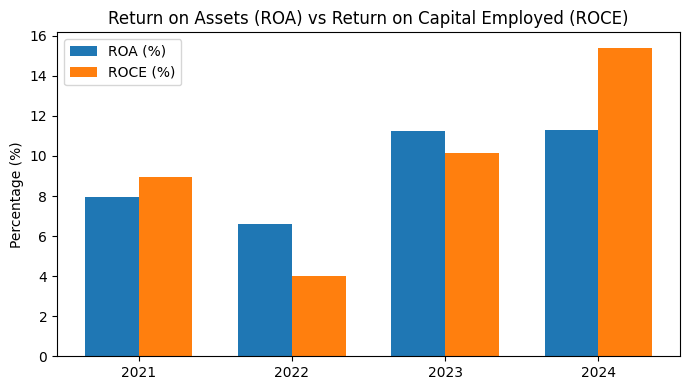

Saved: /content/visuals/performance_summary_dashboard.png


In [24]:
x = np.arange(len(ratios.index))
width = 0.35

plt.figure(figsize=(7,4))
plt.bar(x - width/2, ratios['ROA (%)'], width, label='ROA (%)')
plt.bar(x + width/2, ratios['ROCE (%)'], width, label='ROCE (%)')
plt.xticks(x, ratios.index)
plt.title('Return on Assets (ROA) vs Return on Capital Employed (ROCE)')
plt.ylabel('Percentage (%)')
plt.legend()
plt.tight_layout()
perf_path = os.path.join(output_dir,'performance_summary_dashboard.png')
plt.savefig(perf_path, dpi=150)
plt.show()
print('Saved:', perf_path)
